In [1]:
#Dependencies
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import sqlalchemy
import psycopg2
from sqlalchemy import create_engine
from config import postgres_myinfo

In [2]:
from sqlalchemy import create_engine

In [3]:
#1.Import the SQL database into Pandas. 
engine = create_engine(postgres_myinfo)
connection = engine.connect()

In [4]:
# Read data from PostgreSQL salaries table and load into a DataFrame instance
salaries = pd.read_sql("select * from salaries", connection);
salaries.head()

,emp_no,salary
0,10001,60117
1,10002,65828
2,10003,40006
3,10004,40054
4,10005,78228


In [5]:
# Read data from PostgreSQL employees table and load into a DataFrame instance
employees = pd.read_sql("select * from employees", connection);
employees.head()

,emp_no,emp_title_id,birth_date,first_name,last_name,sex,hire_date
0,473302,s0001,1953-07-25,Hideyuki,Zallocco,M,1990-04-28
1,475053,e0002,1954-11-18,Byong,Delgrande,F,1991-09-07
2,57444,e0002,1958-01-30,Berry,Babb,F,1992-03-21
3,421786,s0001,1957-09-28,Xiong,Verhoeff,M,1987-11-26
4,282238,e0003,1952-10-28,Abdelkader,Baumann,F,1991-01-18


In [6]:
# Read data from PostgreSQL titles table and load into a DataFrame instance
titles = pd.read_sql("select * from titles", connection);
titles.head()

,title_id,title
0,s0001,Staff
1,s0002,Senior Staff
2,e0001,Assistant Engineer
3,e0002,Engineer
4,e0003,Senior Engineer


In [7]:
titles2 = titles.rename(columns={"title_id": "emp_title_id"})
titles2.head()

,emp_title_id,title
0,s0001,Staff
1,s0002,Senior Staff
2,e0001,Assistant Engineer
3,e0002,Engineer
4,e0003,Senior Engineer


In [8]:
#Merge employees and salaries tables
employees_salary = pd.merge(employees,salaries, on="emp_no", how="left")
employees_salary 

,emp_no,emp_title_id,birth_date,first_name,last_name,sex,hire_date,salary
0,473302,s0001,1953-07-25,Hideyuki,Zallocco,M,1990-04-28,40000
1,475053,e0002,1954-11-18,Byong,Delgrande,F,1991-09-07,53422
2,57444,e0002,1958-01-30,Berry,Babb,F,1992-03-21,48973
3,421786,s0001,1957-09-28,Xiong,Verhoeff,M,1987-11-26,40000
4,282238,e0003,1952-10-28,Abdelkader,Baumann,F,1991-01-18,40000
...,...,...,...,...,...,...,...,...
300019,464231,s0001,1958-08-14,Constantino,Eastman,M,1988-10-28,69696
300020,255832,e0002,1955-05-08,Yuping,Dayang,F,1995-02-26,75355
300021,76671,s0001,1959-06-09,Ortrud,Plessier,M,1988-02-24,61886
300022,264920,s0001,1959-09-22,Percy,Samarati,F,1994-09-08,62772


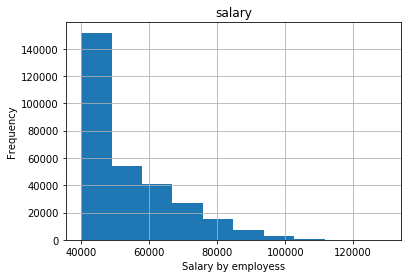

In [9]:
#2.Create a histogram to visualize the most common salary ranges for employees.
employees_salary.hist(column='salary')
plt.xlabel('Salary by employess')
plt.ylabel('Frequency')
plt.show()

In [10]:
#Merge employees_salaries table with titles table
employees_salary_title = pd.merge(employees_salary,titles2, on="emp_title_id", how="inner")
employees_salary_title.head()

,emp_no,emp_title_id,birth_date,first_name,last_name,sex,hire_date,salary,title
0,473302,s0001,1953-07-25,Hideyuki,Zallocco,M,1990-04-28,40000,Staff
1,421786,s0001,1957-09-28,Xiong,Verhoeff,M,1987-11-26,40000,Staff
2,273487,s0001,1957-04-14,Christoph,Parfitt,M,1991-06-28,56087,Staff
3,246449,s0001,1958-03-23,Subbu,Bultermann,F,1988-03-25,87084,Staff
4,48085,s0001,1964-01-19,Venkatesan,Gilg,M,1993-06-28,63016,Staff


In [11]:
salary_by_title=employees_salary_title.groupby(["title"]).mean()["salary"]
df=pd.DataFrame({"Salary by Title":(salary_by_title)})
df

,Salary by Title
title,
Assistant Engineer,48564.434447
Engineer,48535.336511
Manager,51531.041667
Senior Engineer,48506.799871
Senior Staff,58550.172704
Staff,58465.382850
Technique Leader,48582.896092


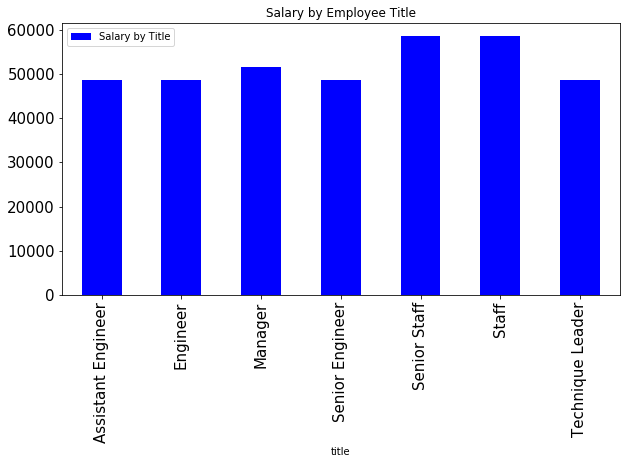

In [12]:
#3.Create a bar chart of average salary by title.

bar_plot=df.plot.bar( y="Salary by Title",title="Salary by Employee Title",color="blue",legend=True,figsize=(10, 5),fontsize=(15))
#rot=90,

##  "Search your ID number."

In [13]:
employees_salary_title.loc[employees_salary_title.emp_no == 499942]

,emp_no,emp_title_id,birth_date,first_name,last_name,sex,hire_date,salary,title
287532,499942,e0004,1963-01-10,April,Foolsday,F,1997-02-10,40000,Technique Leader


In [14]:
salaries.loc[salaries["emp_no"]==499942]

,emp_no,salary
299966,499942,40000


In [15]:
employees.loc[employees["emp_no"]==499942]

,emp_no,emp_title_id,birth_date,first_name,last_name,sex,hire_date
168736,499942,e0004,1963-01-10,April,Foolsday,F,1997-02-10


###### Confirmed the data is fake April Fools day!